In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, lasso_path

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline  

In [18]:
data = pd.read_csv('data_cleaned.csv', index_col=0)
data.drop(['reposts', 'comments', 'likes', 'minute', 'fans_increase'], axis=1, inplace=True)

### Encode hour column to dummy variable

In [19]:
data = pd.get_dummies(data, columns=['hour'])

In [20]:
screen_name_list = data.loc[:, ['screen_name']]
target_list = data.loc[:, ['target']]
data.drop(['screen_name', 'target'], axis=1, inplace=True)

### Data Normaization

In [21]:
Normalizer = MinMaxScaler()
data_normalized = Normalizer.fit_transform(data)

### Split training and validation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized, target_list, test_size=0.25, random_state=12138)

### Lasso Regression and Regularization

In [23]:
alpha, coef_path, _ = lasso_path(X_train, y_train)

In [24]:
alpha_neglog = -np.log10(alpha)

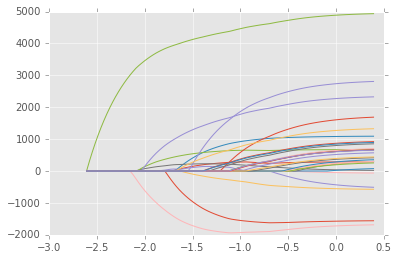

In [25]:
plt.figure(1)
i = 0
for coef_path_temp in coef_path[0]:
    l1 = plt.plot(alpha_neglog, coef_path_temp, label=data.columns[i])
    i += 1

#plt.legend()
plt.show()

In [26]:
feature_weight = coef_path[0][:, 40]
sorted_index = np.argsort(feature_weight)

for _index_ in sorted_index:
    if np.abs(feature_weight[_index_]) > 0:
        print('{}: {}'.format(data.columns[_index_], feature_weight[_index_]))

hour_13: -1810.6428411597046
hour_0: -1166.951850937155
has_tag: -156.0755646970329
word_count: 140.6024839665798
pictures: 194.96056094825605
has_emoji: 227.62880128374957
hour_18: 398.7669313911163
hasgif: 574.8748323346366
has_@: 578.3122459049916
hour_2: 708.6904696521982
hour_16: 1414.0951326751874
hour_12: 4201.872365734835


# Plotly Plot

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

In [37]:
plot_data = []
for i, coef_path_temp in enumerate(coef_path[0]):
    trace = go.Scatter(
        x = alpha_neglog,
        y = coef_path_temp,
        name = data.columns[i]
    )
    plot_data.append(trace)

layout = go.Layout(
    title = "Lasso Regularization Path",
    showlegend=False,
    xaxis = dict(
        title = '-Log(Alpha)',
        zeroline=False
    ),
    yaxis = dict(
        title = 'Coefficients'
    )
) 

figure = go.Figure(data=plot_data, layout=layout)
py.iplot(figure, filename='Lasso Path')